<a href="https://colab.research.google.com/github/juanbrekes/Hackatons/blob/main/1%20-%20The%20Tea%20Story%20-%2020210814/Tea_Price_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Tea Story

This is the first Hackathon i'm participting, so let's see how good will I perform.

Real-world data is not always very legible or easy to understand. A lot of work goes around interpreting certain fields and trying to make some sense of the data by data wrangling, EDA  and imputation, etc. For this challenge, we present unprocessed data for you to get a flavour of a basic data engineering.

In this hackathon, we are challenging the MachineHack community to analyse the temporal nature of tea prices in the training dataset and forecast the weekly average tea price for the 29 weeks mentioned in the test set.

**About Dataset:**

*   Train.csv — 544 rows x 15 columns (includes ‘Average’ as a target variable)
*   Test.csv — 29 rows x 15 columns



**Column details:** 

‘WeekEnding_Date’;“Average Prices across Auction Places Kolkata, Bangalore, Cochin, Darjeeling, Ernakulam, Siliguri and Guwahati”; and Ref_Price across Auction Places Kolkata, Bangalore, Cochin, Darjeeling, Ernakulam, Siliguri and Guwahati.”

**Target Variable:  Average**

The data can be obtained from [this link](https://machinehack.com/hackathons/teastory_weekend_hackathon_edition_2_the_last_hacker_standing/data)

## Step 1: Load the Data

I downloaded the data from the link above and now I load it here to work.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Projects/Machinehack Hackatons/1 - The Tea Story - 20210814/train.csv')

df.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


##Step 2: EDA and Data Cleaning

In [ ]:
df.shape

(544, 16)

In [ ]:
df.dtypes

WeekEnding_Date              object
Kolkata_Average_Price        object
Kolkata_Ref_Price            object
Bangalore_Average_Price      object
Bangalore_Ref_Price          object
Cochin_Average_Price         object
Cochin_Ref_Price             object
Darjeeling_Average_Price     object
Darjeeling_Ref_Price         object
Ernakulam_Average_Price      object
Ernakulam_Ref_Price          object
Siliguri_Average_Price       object
Siliguri_Ref_Price           object
Guwahati_Average_Price       object
Guwahati_Ref_Price           object
Average                     float64
dtype: object

All the variables, except the 'Average' column, is defined as an object. Lets change that. I will drop the 'WeekEnding_Date' column and chanche all other columns to float

In [ ]:
df = df.drop(['WeekEnding_Date'], axis = 1)

In [ ]:
df.columns

Index(['Kolkata_Average_Price', 'Kolkata_Ref_Price', 'Bangalore_Average_Price',
       'Bangalore_Ref_Price', 'Cochin_Average_Price', 'Cochin_Ref_Price',
       'Darjeeling_Average_Price', 'Darjeeling_Ref_Price',
       'Ernakulam_Average_Price', 'Ernakulam_Ref_Price',
       'Siliguri_Average_Price', 'Siliguri_Ref_Price',
       'Guwahati_Average_Price', 'Guwahati_Ref_Price', 'Average'],
      dtype='object')

In [ ]:
features = ['Kolkata_Average_Price', 'Kolkata_Ref_Price', 'Bangalore_Average_Price',
            'Bangalore_Ref_Price', 'Cochin_Average_Price', 'Cochin_Ref_Price',
            'Darjeeling_Average_Price', 'Darjeeling_Ref_Price',
            'Ernakulam_Average_Price', 'Ernakulam_Ref_Price',
            'Siliguri_Average_Price', 'Siliguri_Ref_Price',
            'Guwahati_Average_Price', 'Guwahati_Ref_Price']

for ft in features:
  df[ft] = pd.to_numeric(df[ft], errors = 'coerce')

Let´s look for missing values

In [ ]:
missing_values_count = df.isnull().sum()

print(missing_values_count)

Kolkata_Average_Price       40
Kolkata_Ref_Price           42
Bangalore_Average_Price     47
Bangalore_Ref_Price         49
Cochin_Average_Price        45
Cochin_Ref_Price            49
Darjeeling_Average_Price    37
Darjeeling_Ref_Price        38
Ernakulam_Average_Price     15
Ernakulam_Ref_Price         17
Siliguri_Average_Price      21
Siliguri_Ref_Price          23
Guwahati_Average_Price       9
Guwahati_Ref_Price           9
Average                      0
dtype: int64


Let's see how missing values are distributed

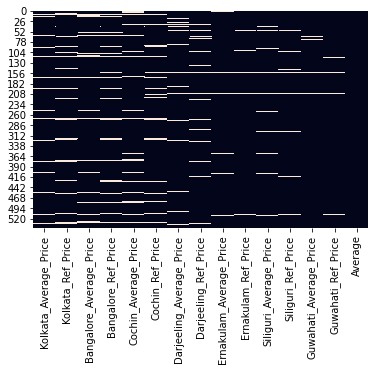

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="rocket")

Missing values are evenly distributed amongst all diferent columns. Since the price tends to rise is tima, i think it is not a good idea to replace the missing values with the mean of all the columns values. I think a better aproach would me to replace ir¿t with me mean of a range of values closer in tima with the missing one. I'll take the five weeks prior and post a missing value and calculate the mean.

In [ ]:
df = df.interpolate()
df['Bangalore_Average_Price'][0] = df['Bangalore_Average_Price'][1]

# This last step is bacause I can't interpolate the first value of the column, since I don't have any previous number

In [ ]:
missing_values_count = df.isnull().sum()

print(missing_values_count)

Kolkata_Average_Price       0
Kolkata_Ref_Price           0
Bangalore_Average_Price     0
Bangalore_Ref_Price         0
Cochin_Average_Price        0
Cochin_Ref_Price            0
Darjeeling_Average_Price    0
Darjeeling_Ref_Price        0
Ernakulam_Average_Price     0
Ernakulam_Ref_Price         0
Siliguri_Average_Price      0
Siliguri_Ref_Price          0
Guwahati_Average_Price      0
Guwahati_Ref_Price          0
Average                     0
dtype: int64


I'll now check for possible outliers

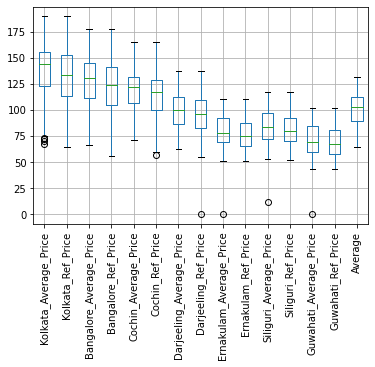

In [ ]:
df.boxplot(rot = 90)

I can see some rare values on the 'Darjeeling_Ref_Price', 'Ernakulam_Average_Price', 'Siliguri_Average_Price' and 'Guwahati_Average_Price' columns. I'll leave them (for now) since a don´t think it will affect the overall result 

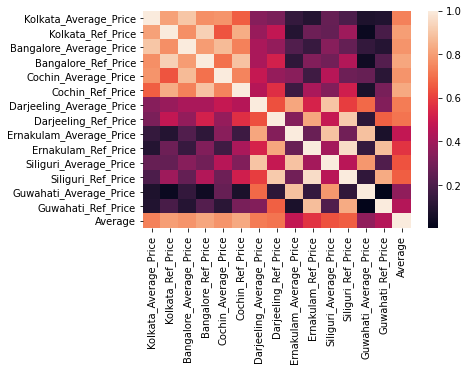

In [ ]:
correlation = df.corr()

sns.heatmap(correlation)

plt.show()

## Model Selection

This is a regression model, so I will try 3 different models. I will try linear regression, random forest and a neural network, and see wich one performed better.

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[features]
y = df.Average

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 1)

In [ ]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, preds))

In [ ]:
print("RMSE from Linear Regression:")
print(score_dataset(X_train, X_valid, y_train, y_valid))

RMSE from Linear Regression:
2.6034428070864895


I'll try again but only with the features that have more correlation with 'Average'

In [ ]:
features2 = ['Kolkata_Average_Price','Kolkata_Ref_Price','Bangalore_Average_Price',
             'Bangalore_Ref_Price','Cochin_Average_Price','Cochin_Ref_Price']
X2 = df[features2]

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y, train_size=0.7, test_size=0.3, random_state = 1)

In [ ]:
print("RMSE from Linear Regression 2:")
print(score_dataset(X_train2, X_valid2, y_train2, y_valid2))

RMSE from Linear Regression 2:
6.578525618367622


It seems that by selecting less variables I got worse results than by using all the dataset. So I'll keep the original results. 
Finally, lets try if by normalizing the variables I get better results...

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Normalize variables

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

print("RMSE from Linear Regression 2:")
print(score_dataset(X_train_scaled, X_valid_scaled, y_train, y_valid))

RMSE from Linear Regression 2:
2.6034428070864886


It doesn't help at all. So lets keep the first result.

### Random Forest

Here I'm going to try different number of estimators to see if it improves the result.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable

In [ ]:
estimators = [100, 200, 500, 1000]

X = df[features]
y = df.Average

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 1)

After trying many different number of estimators I could see that it doesn´t improve so much the results, so I'll jus keep the result that gave me the best outcome.

In [ ]:
from prettytable import PrettyTable

def test_rf(estimators,X_train, X_valid, y_train, y_valid):
  results = []
  for estimator in estimators:
    model = RandomForestRegressor(n_estimators=estimator, random_state = 1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    results.append(np.sqrt(mean_squared_error(y_valid, preds)))
  
  min_result = min(results)
  min_result_index = results.index(min_result)
  optimal_estimator = estimators[min_result_index]

  print(f'The best number of estimators for the model is {optimal_estimator}')
  
  return min_result

In [ ]:
print("RMSE from Random Forest:")
print(test_rf(estimators,X_train, X_valid, y_train, y_valid))

RMSE from Random Forest:
The best number of estimators for the model is 500
3.154619738908847


It seems that the Random Forest performs poorly compared to Linear Regression

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

X = df[features]
y = df.Average

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 1)

def model_nn(X_train, X_valid, y_train, y_valid):
  
  model_nn = Sequential()

  model_nn.add(Dense(16,input_dim=X_train_scaled.shape[1],activation='relu'))
  model_nn.add(Dense(8,activation='relu'))
  model_nn.add(Dense(4,activation='relu'))
  model_nn.add(Dense(1,activation='linear'))

  model_nn.compile(loss='mean_squared_error',optimizer='adam')

  model_nn.summary()
  epochs=20
  batch_size=10

  model_nn.fit(X_train,np.log(y_train),verbose=0,validation_data=(X_valid,np.log(y_valid)),epochs=epochs,batch_size=batch_size)

  predictions_nn = model_nn.predict(X_valid)

  return np.sqrt(mean_squared_error(y_valid, predictions_nn))

In [ ]:
print("RMSE from Neural Network:")
print(model_nn(X_train, X_valid, y_train, y_valid))

RMSE from Neural Network:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
97.24268159879112


This is by far the worst model...

## Model Selection

It seems that the best model is the simplest one too... at least for now.
I will go a bit deeper

In [ ]:
final_model = LinearRegression()

final_model.fit(X_train, y_train)
preds = final_model.predict(X_valid)

RMSE = round(np.sqrt(mean_squared_error(y_valid, preds)),3)
R2S = round(r2_score(y_valid, preds),3)
print(f'The RMSE of the Linear Regression model is {RMSE}')
print(f'The R2 Score of the Linear Regression model is {R2S}')

The RMSE of the Linear Regression model is 2.603
The R2 Score of the Linear Regression model is 0.965


I'm going to use othe library also to get more precise indicators. I'll use tha **Statsmodels** library so I can get some stadistical tests...

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
model_new = sm.OLS(endog=y_train, exog=X_train,)
model_new = model_new.fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                Average   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     441.7
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          5.95e-219
Time:                        14:50:34   Log-Likelihood:                -981.47
No. Observations:                 380   AIC:                             1993.
Df Residuals:                     365   BIC:                             2052.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The R squared value indicates that the model is capable of explain 94.4% of the variability. The P-value (5.95e-219) is very small so we can expect that the results of the model are better that the ones obtained by a random act.

According to the partial p-value, the following variables don´s add much to the model.

* Siliguri_Ref_Price
* Darjeeling_Average_Price
* Bangalore_Ref_Price
* Bangalore_Average_Price

I will try get rid of these variables and perform the analysis again...

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

In [ ]:
X_train_new = X_train.drop(columns = ['Siliguri_Ref_Price', 'Darjeeling_Average_Price', 'Bangalore_Ref_Price', 'Bangalore_Average_Price'])
X_valid_new  = X_valid.drop(columns = ['Siliguri_Ref_Price', 'Darjeeling_Average_Price', 'Bangalore_Ref_Price', 'Bangalore_Average_Price'])

In [ ]:
model_new = sm.OLS(endog=y_train, exog=X_train_new,)
model_new = model_new.fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                Average   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     619.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          8.20e-224
Time:                        14:50:34   Log-Likelihood:                -983.01
No. Observations:                 380   AIC:                             1988.
Df Residuals:                     369   BIC:                             2031.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

The model did´t got better with this changes. For the results submission i will still use the LinearRegression model, but now i will make some graphs to analize the residuals

### Residual Diagnosis

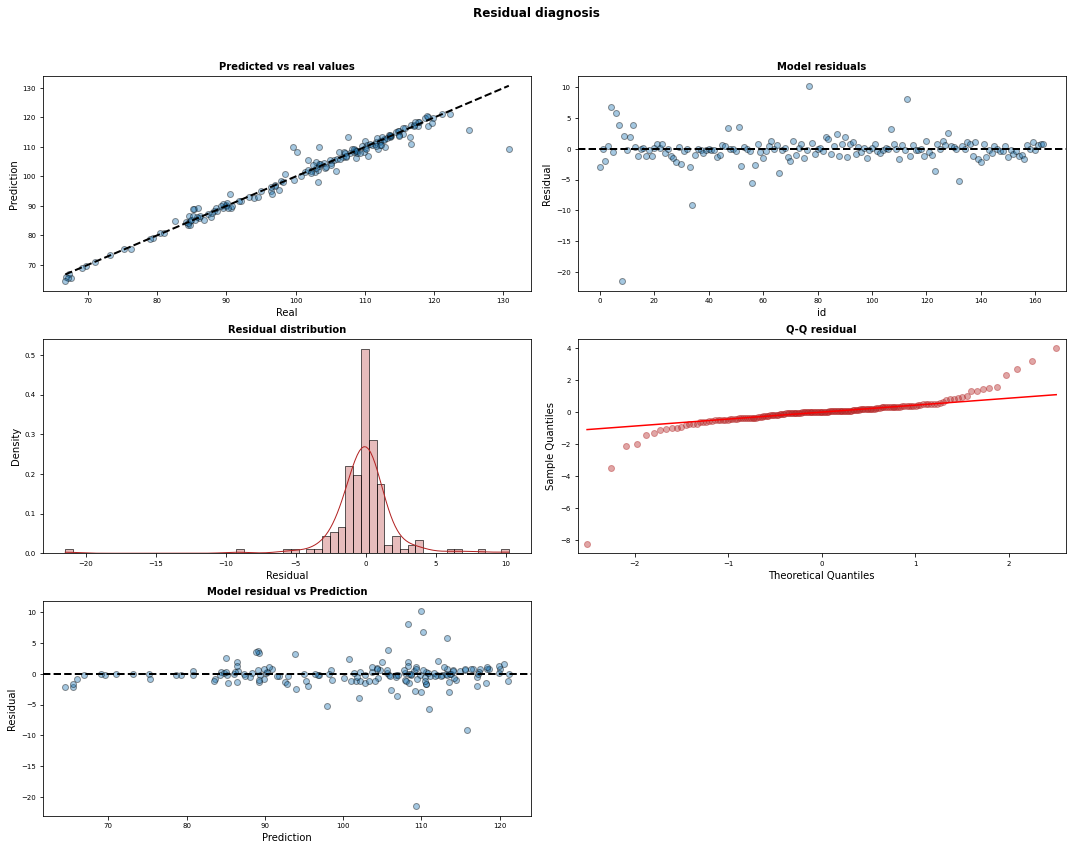

In [ ]:
y_valid_graph = y_valid
prediction = final_model.predict(X_valid)
residual   = prediction - y_valid_graph

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

axes[0, 0].scatter(y_valid, preds, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted vs real values', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_valid))), residual,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residual,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Residual distribution', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residual")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residual,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residual', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction, residual,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residual vs Prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residual')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual diagnosis', fontsize = 12, fontweight = "bold");


We can see that the model performs slightly worse in the range between 105 and 115. However, the results seems pretty good for a first try.